Fernando Cerrieño Magaña A01702790

<h2>Ejercicio 1

En este ejercicio trabajarás con el conjunto de datos que se te asignó de acuerdo al último número de tu matrícula. En estos archivos se tienen datos procesados de un experimento de psicología en el que se mide la respuesta cerebral cuando un sujeto presta atención a un estímulo visual que aparece de manera repentina y cuando no presta atención a dicho estímulo visual.

La primera columna corresponde a la clase (1 o 2). La clase 1 representa cuando el sujeto está prestando atención, y la clase 2 cuando no lo hace. La segunda columna se ignora, mientras que el resto de las columnas indican las variables que se calcularon de la respuesta cerebral medida con la técnicas de Electroencefaolografía para cada caso.

In [ ]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold, GridSearchCV, KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif, SequentialFeatureSelector, RFE

import numpy.linalg as ln

In [ ]:
data = np.loadtxt('/content/P1_1.txt')
df = pd.DataFrame(data)

Revisión del balanceao de los datos

In [ ]:
distribucion_porcentaje = df[0].value_counts(normalize=True) * 100

print("Distribución de clases en porcentaje:")
print(distribucion_porcentaje)

Distribución de clases en porcentaje:
2.0    80.043073
1.0    19.956927
Name: 0, dtype: float64


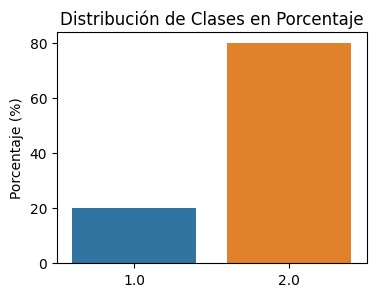

In [ ]:
plt.figure(figsize=(4, 3))
sns.barplot(x=distribucion_porcentaje.index, y=distribucion_porcentaje.values)
plt.title('Distribución de Clases en Porcentaje')
plt.ylabel('Porcentaje (%)')
plt.show()

Dfinición de las variables dependientes e independientes

In [ ]:
y = df[0]
x = df.iloc[:,2:]

x = x.to_numpy()
y = y.to_numpy()

Clasificador 1: Árbol de Decisión

In [ ]:
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x_test = x[test_index, :]
    y_test = y[test_index]

    x1 = x_train[y_train==1, :]
    y1 = y_train[y_train==1]
    n1 = len(y1)

    x2 = x_train[y_train==2, :]
    y2 = y_train[y_train==2]
    n2 = len(y2)

    ind = random.choices([i for i in range(n1)], k = n2)
    x_sub = np.concatenate((x1[ind,:], x2), axis=0)
    y_sub = np.concatenate((y1[ind], y2), axis=0)

    clf = DecisionTreeClassifier()
    clf.fit(x_sub, y_sub)

    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

              precision    recall  f1-score   support

         1.0       0.55      0.56      0.56       278
         2.0       0.89      0.89      0.89      1115

    accuracy                           0.82      1393
   macro avg       0.72      0.72      0.72      1393
weighted avg       0.82      0.82      0.82      1393



Clasificador 2: Máquinas de Soporte Vectorial lineal (SVM)

In [ ]:
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x_test = x[test_index, :]
    y_test = y[test_index]

    x1 = x_train[y_train==1, :]
    y1 = y_train[y_train==1]
    n1 = len(y1)

    x2 = x_train[y_train==2, :]
    y2 = y_train[y_train==2]
    n2 = len(y2)

    ind = random.choices([i for i in range(n1)], k = n2)
    x_sub = np.concatenate((x1[ind,:], x2), axis=0)
    y_sub = np.concatenate((y1[ind], y2), axis=0)

    clf = SVC(kernel = 'linear')
    clf.fit(x_sub, y_sub)

    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

              precision    recall  f1-score   support

         1.0       0.66      0.85      0.74       278
         2.0       0.96      0.89      0.92      1115

    accuracy                           0.88      1393
   macro avg       0.81      0.87      0.83      1393
weighted avg       0.90      0.88      0.89      1393



Clasificador 3: Random Forest

In [ ]:
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x1 = x_train[y_train==1, :]
    y1 = y_train[y_train==1]
    n1 = len(y1)

    x2 = x_train[y_train==2, :]
    y2 = y_train[y_train==2]
    n2 = len(y2)

    ind = random.choices([i for i in range(n1)], k = n2)
    x_sub = np.concatenate((x1[ind,:], x2), axis=0)
    y_sub = np.concatenate((y1[ind], y2), axis=0)

    clf = RandomForestClassifier()
    clf.fit(x_sub, y_sub)

    x_test = x[test_index, :]
    y_test = y[test_index]

    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

              precision    recall  f1-score   support

         1.0       0.87      0.59      0.70       278
         2.0       0.91      0.98      0.94      1115

    accuracy                           0.90      1393
   macro avg       0.89      0.78      0.82      1393
weighted avg       0.90      0.90      0.89      1393



Clasificador 4: K Vecinos Más Cercanos (KNN)

In [ ]:
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x1 = x_train[y_train==1, :]
    y1 = y_train[y_train==1]
    n1 = len(y1)

    x2 = x_train[y_train==2, :]
    y2 = y_train[y_train==2]
    n2 = len(y2)

    ind = random.choices([i for i in range(n1)], k = n2)
    x_sub = np.concatenate((x1[ind,:], x2), axis=0)
    y_sub = np.concatenate((y1[ind], y2), axis=0)

    clf = KNeighborsClassifier(n_neighbors=3)
    clf.fit(x_sub, y_sub)

    x_test = x[test_index, :]
    y_test = y[test_index]

    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

              precision    recall  f1-score   support

         1.0       0.47      0.69      0.56       278
         2.0       0.91      0.81      0.86      1115

    accuracy                           0.78      1393
   macro avg       0.69      0.75      0.71      1393
weighted avg       0.82      0.78      0.80      1393



Clasificador 5: Analisis de discriminante lineal

In [ ]:
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x1 = x_train[y_train==1, :]
    y1 = y_train[y_train==1]
    n1 = len(y1)

    x2 = x_train[y_train==2, :]
    y2 = y_train[y_train==2]
    n2 = len(y2)

    ind = random.choices([i for i in range(n1)], k = n2)
    x_sub = np.concatenate((x1[ind,:], x2), axis=0)
    y_sub = np.concatenate((y1[ind], y2), axis=0)

    clf = LinearDiscriminantAnalysis()
    clf.fit(x_sub, y_sub)

    x_test = x[test_index, :]
    y_test = y[test_index]

    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

              precision    recall  f1-score   support

         1.0       0.63      0.81      0.71       278
         2.0       0.95      0.88      0.91      1115

    accuracy                           0.87      1393
   macro avg       0.79      0.84      0.81      1393
weighted avg       0.89      0.87      0.87      1393



Regresión logística desde cero

Funciones

In [ ]:
# Función sigmoide
def sigmoid(z):
    return 1./(1. + np.exp(-z))

# Descenso de gradiente para regresión logística
def grad(X, y, theta, num_iter):
    m = len(y)
    for _ in range(num_iter):
        z = np.dot(X, theta)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / m
        theta -= 0.1 * gradient
    return theta

# Función para predecir etiquetas de clase (1 o 2)
def predict(X, theta):
    z = np.dot(X, theta)
    h = sigmoid(z)
    # Transformar las probabilidades a etiquetas 1 o 2
    return (h > 0.5).astype(int) + 1

In [ ]:
theta = np.zeros(x.shape[1])
num_iter = 3000

kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x1 = x_train[y_train==1, :]
    y1 = y_train[y_train==1]
    n1 = len(y1)

    x2 = x_train[y_train==2, :]
    y2 = y_train[y_train==2]
    n2 = len(y2)

    ind = random.choices([i for i in range(n1)], k = n2)
    x_sub = np.concatenate((x1[ind,:], x2), axis=0)
    y_sub = np.concatenate((y1[ind], y2), axis=0)

    theta = grad(x_sub, y_sub, theta, num_iter)

    x_test = x[test_index, :]
    y_test = y[test_index]

    y_pred = predict(x_test, theta)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

<ipython-input-27-d3c658054f21>:3: RuntimeWarning: overflow encountered in exp
  return 1./(1. + np.exp(-z))


              precision    recall  f1-score   support

         1.0       0.24      0.14      0.17       278
         2.0       0.81      0.89      0.85      1115

    accuracy                           0.74      1393
   macro avg       0.52      0.51      0.51      1393
weighted avg       0.69      0.74      0.71      1393



Número óptimo de características

Filter en SVM lineal

---- n features = 1
ACC: 0.7422578066578994
---- n features = 2
ACC: 0.7559062427477372
---- n features = 3
ACC: 0.7875325546014801
---- n features = 4
ACC: 0.7961604909620692
---- n features = 5
ACC: 0.8133467419612697
---- n features = 6
ACC: 0.8212294680384724
---- n features = 7
ACC: 0.8126685748175653
---- n features = 8
ACC: 0.839181557979423
---- n features = 9
ACC: 0.8435135762357856
---- n features = 10
ACC: 0.8607307702225316
---- n features = 11
ACC: 0.8600190815089863
---- n features = 12
ACC: 0.8650292669090532
---- n features = 13
ACC: 0.8506742992702613
---- n features = 14
ACC: 0.8600061885975091
---- n features = 15
ACC: 0.859289342719373
---- n features = 16
ACC: 0.872950671720688
---- n features = 17
ACC: 0.8664681158299168
---- n features = 18
ACC: 0.8779660142853458
---- n features = 19
ACC: 0.8786777029988911
---- n features = 20
ACC: 0.8743456847425286
---- n features = 21
ACC: 0.8786725458343003
---- n features = 22
ACC: 0.8800907660967999
---- n features = 23
A

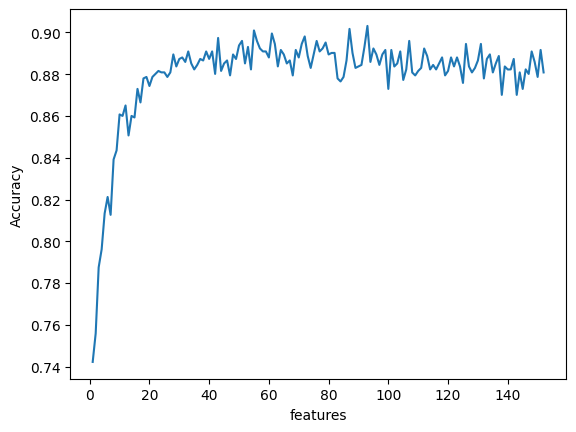

Selected features:  ['x0' 'x2' 'x3' 'x4' 'x6' 'x7' 'x11' 'x12' 'x13' 'x14' 'x15' 'x16' 'x17'
 'x18' 'x19' 'x20' 'x21' 'x22' 'x23' 'x24' 'x25' 'x26' 'x27' 'x28' 'x29'
 'x30' 'x31' 'x32' 'x36' 'x37' 'x38' 'x39' 'x40' 'x50' 'x51' 'x54' 'x55'
 'x56' 'x57' 'x60' 'x61' 'x62' 'x63' 'x64' 'x65' 'x66' 'x67' 'x73' 'x74'
 'x76' 'x77' 'x78' 'x79' 'x80' 'x81' 'x82' 'x83' 'x84' 'x87' 'x88' 'x89'
 'x90' 'x91' 'x92' 'x93' 'x96' 'x97' 'x103' 'x104' 'x111' 'x112' 'x113'
 'x115' 'x116' 'x117' 'x118' 'x120' 'x121' 'x123' 'x124' 'x125' 'x126'
 'x127' 'x129' 'x130' 'x133' 'x134' 'x139' 'x140' 'x141' 'x142' 'x148'
 'x149']


In [ ]:
n_feats = list(range(1,len(x[0])))

acc_nfeat = []

for n_feat in n_feats:
    print('---- n features =', n_feat)

    acc_cv = []

    kf = StratifiedKFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x, y):

        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]

        x1 = x_train[y_train==1, :]
        y1 = y_train[y_train==1]
        n1 = len(y1)

        x2 = x_train[y_train==2, :]
        y2 = y_train[y_train==2]
        n2 = len(y2)

        ind = random.choices([i for i in range(n1)], k = n2)
        x_sub = np.concatenate((x1[ind,:], x2), axis=0)
        y_sub = np.concatenate((y1[ind], y2), axis=0)

        clf_cv = SVC(kernel = 'linear')

        fselection_cv = SelectKBest(f_classif, k = n_feat)
        fselection_cv.fit(x_sub, y_sub)
        x_train = fselection_cv.transform(x_sub)

        clf_cv.fit(x_train, y_sub)

        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = clf_cv.predict(x_test)


        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)

    acc = np.average(acc_cv)
    acc_nfeat.append(acc)

    print('ACC:', acc)

opt_index = np.argmax(acc_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

plt.plot(n_feats, acc_nfeat)
plt.xlabel("features")
plt.ylabel("Accuracy")

plt.show()

# Fit model with optimal number of features
clf = SVC(kernel = 'linear')
fselection = SelectKBest(f_classif, k = opt_features)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

Wrapper

---- n features = 1
ACC: 0.7372192568525824
---- n features = 2
ACC: 0.7803434671617545
Optimal number of features:  2


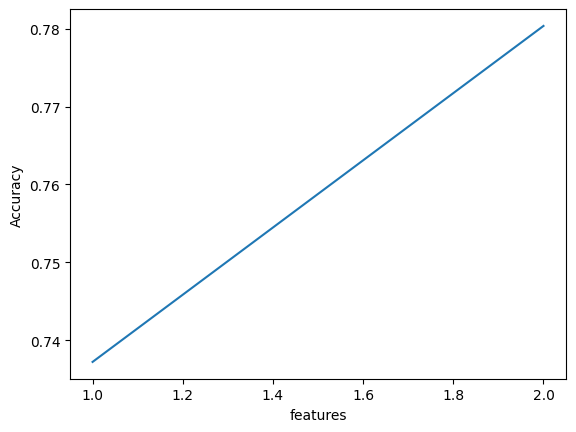

Selected features:  ['x13' 'x18']


In [ ]:
#Se esta evaluando unicamente con 1 caracteristica debido a que tarda mucho tiempo en ejecutarse con todas
#Si se quiere probar con todas se tiene que cambiar n_feats a n_feats = list(range(1,len(x[0])))
n_feats = [1,2]#[1, 2, 3, 4]

acc_nfeat = []

for n_feat in n_feats:
    print('---- n features =', n_feat)

    acc_cv = []

    kf = StratifiedKFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x, y):

        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]

        x1 = x_train[y_train==1, :]
        y1 = y_train[y_train==1]
        n1 = len(y1)

        x2 = x_train[y_train==2, :]
        y2 = y_train[y_train==2]
        n2 = len(y2)

        ind = random.choices([i for i in range(n1)], k = n2)
        x_sub = np.concatenate((x1[ind,:], x2), axis=0)
        y_sub = np.concatenate((y1[ind], y2), axis=0)

        clf_cv = SVC(kernel = 'linear')

        fselection_cv = SequentialFeatureSelector(clf_cv, n_features_to_select=n_feat)
        fselection_cv.fit(x_sub, y_sub)
        x_train = fselection_cv.transform(x_sub)

        clf_cv.fit(x_train, y_sub)

        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = clf_cv.predict(x_test)


        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)

    acc = np.average(acc_cv)
    acc_nfeat.append(acc)

    print('ACC:', acc)

opt_index = np.argmax(acc_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

plt.plot(n_feats, acc_nfeat)
plt.xlabel("features")
plt.ylabel("Accuracy")

plt.show()

# Fit model with optimal number of features
clf = SVC(kernel = 'linear')
fselection = SequentialFeatureSelector(clf, n_features_to_select = opt_features)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

Filter-Wrapper

---- n features = 1
ACC: 0.7221551790825405
---- n features = 2
ACC: 0.800415151749568
Optimal number of features:  2


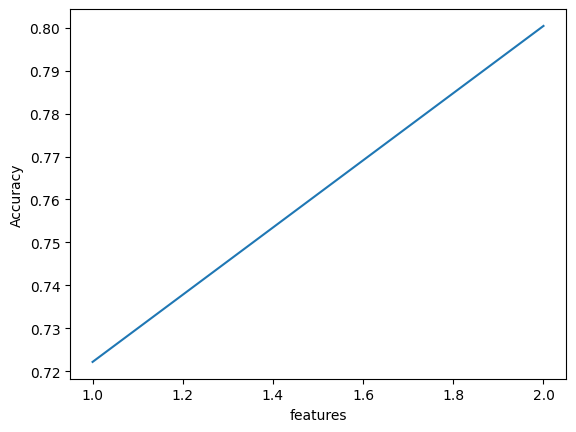

Selected features:  ['x13' 'x18']


In [ ]:
n_feats = [1,2]#[1, 2, 3, 4]

acc_nfeat = []

for n_feat in n_feats:
    print('---- n features =', n_feat)

    acc_cv = []

    kf = StratifiedKFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x, y):

        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]

        x1 = x_train[y_train==1, :]
        y1 = y_train[y_train==1]
        n1 = len(y1)

        x2 = x_train[y_train==2, :]
        y2 = y_train[y_train==2]
        n2 = len(y2)

        ind = random.choices([i for i in range(n1)], k = n2)
        x_sub = np.concatenate((x1[ind,:], x2), axis=0)
        y_sub = np.concatenate((y1[ind], y2), axis=0)

        clf_cv = SVC(kernel = 'linear')

        fselection_cv = RFE(clf_cv, n_features_to_select=n_feat)
        fselection_cv.fit(x_sub, y_sub)
        x_train = fselection_cv.transform(x_sub)

        clf_cv.fit(x_train, y_sub)

        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = clf_cv.predict(x_test)


        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)

    acc = np.average(acc_cv)
    acc_nfeat.append(acc)

    print('ACC:', acc)

opt_index = np.argmax(acc_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

plt.plot(n_feats, acc_nfeat)
plt.xlabel("features")
plt.ylabel("Accuracy")

plt.show()

# Fit model with optimal number of features
clf = SVC(kernel = 'linear')
fselection = RFE(clf, n_features_to_select = opt_features)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())


Ajuste del modelo con las características encontradas enn filter.

Variables seleccionadas:

Selected features:  ['x3' 'x11' 'x12' 'x13' 'x14' 'x16' 'x17' 'x18' 'x19' 'x20' 'x21' 'x22'
 'x23' 'x26' 'x27' 'x28' 'x29' 'x30' 'x31' 'x32' 'x38' 'x39' 'x55' 'x56'
 'x60' 'x61' 'x62' 'x64' 'x65' 'x66' 'x67' 'x76' 'x77' 'x78' 'x79' 'x80'
 'x81' 'x82' 'x83' 'x87' 'x88' 'x89' 'x90' 'x91' 'x92' 'x112' 'x113'
 'x116' 'x117' 'x123' 'x124' 'x125' 'x126' 'x127' 'x140' 'x141']

In [ ]:
X = pd.DataFrame(x)

In [ ]:
X = X.loc[:, [3,11,12,13,14,16,17,18,19,20,21,22,23,26,27,28,29,30,31,32,38,39,55,56,60,61,62,64,65,66,67,76,77,78,79,80,81,82,83,87,88,89,90,91,92,112,113,116,117,123,124,125,126,127,140,141]]

In [ ]:
x = X.to_numpy()

Selección de características

---- n features = 1
ACC: 0.7279105747659936
---- n features = 2
ACC: 0.7566462958665326
---- n features = 3
ACC: 0.790361259379593
---- n features = 4
ACC: 0.8004280446610453
---- n features = 5
ACC: 0.8090585596039297
---- n features = 6
ACC: 0.8169283927696552
---- n features = 7
ACC: 0.8176529743946779
---- n features = 8
ACC: 0.8413372527784224
---- n features = 9
ACC: 0.8506717206879658
---- n features = 10
ACC: 0.8484979758128981
---- n features = 11
ACC: 0.8593048142131456
---- n features = 12
ACC: 0.8557102704932827
---- n features = 13
ACC: 0.8614244088600088
---- n features = 14
ACC: 0.8578530723808051
---- n features = 15
ACC: 0.8607385059694181
---- n features = 16
ACC: 0.8750934736082101
---- n features = 17
ACC: 0.871496351306052
---- n features = 18
ACC: 0.8664939016528713
---- n features = 19
ACC: 0.8736520461050514
---- n features = 20
ACC: 0.8801062375905728
---- n features = 21
ACC: 0.885134473066708
---- n features = 22
ACC: 0.871496351306052
---- n features = 23
AC

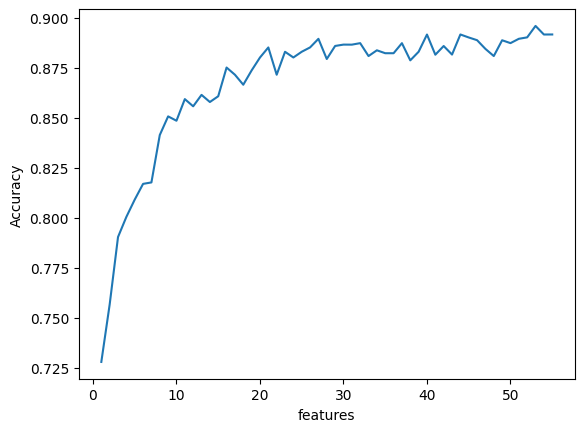

Selected features:  ['x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x8' 'x9' 'x10' 'x11' 'x12' 'x13'
 'x14' 'x15' 'x16' 'x17' 'x18' 'x19' 'x20' 'x21' 'x22' 'x23' 'x24' 'x25'
 'x26' 'x27' 'x28' 'x29' 'x30' 'x32' 'x33' 'x34' 'x35' 'x36' 'x37' 'x38'
 'x39' 'x40' 'x41' 'x42' 'x43' 'x44' 'x45' 'x46' 'x47' 'x48' 'x49' 'x50'
 'x51' 'x52' 'x53' 'x55']


In [ ]:
n_feats = list(range(1,len(x[0])))

acc_nfeat = []

for n_feat in n_feats:
    print('---- n features =', n_feat)

    acc_cv = []

    kf = StratifiedKFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x, y):

        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]

        x1 = x_train[y_train==1, :]
        y1 = y_train[y_train==1]
        n1 = len(y1)

        x2 = x_train[y_train==2, :]
        y2 = y_train[y_train==2]
        n2 = len(y2)

        ind = random.choices([i for i in range(n1)], k = n2)
        x_sub = np.concatenate((x1[ind,:], x2), axis=0)
        y_sub = np.concatenate((y1[ind], y2), axis=0)

        clf_cv = SVC(kernel = 'linear')

        fselection_cv = SelectKBest(f_classif, k = n_feat)
        fselection_cv.fit(x_sub, y_sub)
        x_train = fselection_cv.transform(x_sub)

        clf_cv.fit(x_train, y_sub)

        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = clf_cv.predict(x_test)


        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)

    acc = np.average(acc_cv)
    acc_nfeat.append(acc)

    print('ACC:', acc)

opt_index = np.argmax(acc_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

plt.plot(n_feats, acc_nfeat)
plt.xlabel("features")
plt.ylabel("Accuracy")

plt.show()

# Fit model with optimal number of features
clf = SVC(kernel = 'linear')
fselection = SelectKBest(f_classif, k = opt_features)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

In [ ]:
X = pd.DataFrame(x)
X = X.loc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,21,25,26,27,28,29,32,33,34,35,36,37,40,41,42,43,44,45,46,47,48,49,50,51,52]]
x = X.to_numpy()

Ajuste del modelo SVM lineal

In [ ]:
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

In [ ]:
for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x_test = x[test_index, :]
    y_test = y[test_index]

    x1 = x_train[y_train==1, :]
    y1 = y_train[y_train==1]
    n1 = len(y1)

    x2 = x_train[y_train==2, :]
    y2 = y_train[y_train==2]
    n2 = len(y2)

    ind = random.choices([i for i in range(n1)], k = n2)
    x_sub = np.concatenate((x1[ind,:], x2), axis=0)
    y_sub = np.concatenate((y1[ind], y2), axis=0)

    clf = SVC(kernel = 'linear')
    clf.fit(x_sub, y_sub)

    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

              precision    recall  f1-score   support

         1.0       0.68      0.88      0.77       278
         2.0       0.97      0.90      0.93      1115

    accuracy                           0.89      1393
   macro avg       0.82      0.89      0.85      1393
weighted avg       0.91      0.89      0.90      1393



¿Qué pasa si no se considera el problema de tener datos desbalanceados para este caso? ¿Por qué?

**Si se llega a omitir el desbalanceo de los datos puede tener diferentes efectos en el renddimiento del modelo y en la interpretación de los resultados, esto es debido a que una de las clases tiene muchas más instancias que la otra u otras, entre los problemas más comunes se tienen, la dificultad al evaluar el rendimiento del modelo, un sesgo hacia la clase mayoritaria o un rendimiento deficiente en la clase minoritaria**

De todos los clasificadores, ¿cuál o cuales consideras que son adecuados para los datos? ¿Qué propiedades tienen dichos modelos que los hacen apropiados para los datos? Argumenta tu respuesta.

**Entre todos los clasificadores revisados opino que el clasificador SVM se ajusta de la mejor forma, creo que esto se debe a que los SVM pueden funcionar bien en conjuntos de datos con un gran número de características debido a su capacidad para separar datos en un espacio con muchas dimensiones. Esta capcidad de separación ayuda a que el algoritmo pueda maximizar la distancia entre los puntos de datos de diferentes clases, lo que ayuda a clasificarlos de la mejor manera posible.**

¿Es posibles reducir la dimensionalidad del problema sin perder rendimiento en el modelo? ¿Por qué?

**Si es posible, siempre y cuando se realice una selección de características o una reducción de dimensionalidad de manera cuidadosa y estratégica, como: eliminación de características irrelevantes o redundantes o haciendo una reducción del riesgo de sobreajuste.**

¿Qué método de selección de características consideras el más adecuado para este caso? ¿Por qué?

**Para este caso considero que el clasificador de maquinas de soporte vectorial es el mas adecuado, esto es debido a loque se explico previamente, ya que pocos modelos pueden trabajar bien cuando se cuantan con muchos parametros.**

Si quisieras mejorar el rendimiento de tus modelos, ¿qué más se podría hacer?

**Creo que un area que se podria mejorar en estte caso podria ser la selección de hiperparametros, ya que al obtener el valor optimo la eficiencia del modelo puede ser elevada considerablemente.**

<h2>Ejercicio 2

En este ejercicio trabajarás con datos que vienen de un experimento en el que se midió actividad muscular con la técnica de la Electromiografía en el brazo derecho de varios participantes cuando éstos realizaban un movimiento con la mano entre siete posible (Flexionar hacia arriba, Flexionar hacia abajo, Cerrar la mano, Estirar la mano, Abrir la mano, Coger un objeto, No moverse).

In [ ]:
data = np.loadtxt('/content/M_5.txt')
df = pd.DataFrame(data)

Distribución de los datos

In [ ]:
distribucion_porcentaje = df[0].value_counts(normalize=True) * 100

print("Distribución de clases en porcentaje:")
print(distribucion_porcentaje)

Distribución de clases en porcentaje:
1.0    14.308426
2.0    14.308426
3.0    14.308426
4.0    14.308426
5.0    14.308426
6.0    14.308426
7.0    14.149444
Name: 0, dtype: float64


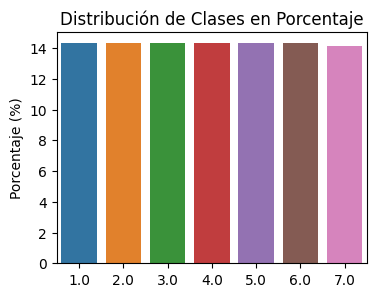

In [ ]:
plt.figure(figsize=(4, 3))
sns.barplot(x=distribucion_porcentaje.index, y=distribucion_porcentaje.values)
plt.title('Distribución de Clases en Porcentaje')
plt.ylabel('Porcentaje (%)')
plt.show()

Analizando los datos se determina que los datos se encuentran balanceados

Clasificadores

In [ ]:
y = df[0]
x = df.iloc[:,2:]

x = x.to_numpy()
y = y.to_numpy()

1. Árbol de decisiones

In [ ]:
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x_test = x[test_index, :]
    y_test = y[test_index]

    clf = DecisionTreeClassifier()
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

              precision    recall  f1-score   support

         1.0       0.78      0.77      0.77        90
         2.0       0.50      0.57      0.53        90
         3.0       0.93      0.88      0.90        90
         4.0       0.83      0.88      0.85        90
         5.0       0.74      0.68      0.71        90
         6.0       0.57      0.56      0.56        90
         7.0       0.98      0.98      0.98        89

    accuracy                           0.76       629
   macro avg       0.76      0.76      0.76       629
weighted avg       0.76      0.76      0.76       629



2. Maquina de soporte vectorial lineal (SVM)

In [ ]:
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x_test = x[test_index, :]
    y_test = y[test_index]

    clf = SVC(kernel = 'linear')
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

              precision    recall  f1-score   support

         1.0       0.99      0.92      0.95        90
         2.0       0.68      0.70      0.69        90
         3.0       0.97      0.97      0.97        90
         4.0       0.99      0.99      0.99        90
         5.0       0.95      0.98      0.96        90
         6.0       0.72      0.71      0.72        90
         7.0       0.98      0.99      0.98        89

    accuracy                           0.89       629
   macro avg       0.89      0.89      0.89       629
weighted avg       0.89      0.89      0.89       629



3. Random Forest

In [ ]:
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x_test = x[test_index, :]
    y_test = y[test_index]

    clf = RandomForestClassifier()
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

              precision    recall  f1-score   support

         1.0       0.96      0.88      0.92        90
         2.0       0.68      0.70      0.69        90
         3.0       0.95      0.93      0.94        90
         4.0       0.97      0.93      0.95        90
         5.0       0.89      0.96      0.92        90
         6.0       0.71      0.72      0.71        90
         7.0       0.98      1.00      0.99        89

    accuracy                           0.87       629
   macro avg       0.88      0.87      0.88       629
weighted avg       0.88      0.87      0.88       629



4. K Vecinos más cercanos (KNN)

In [ ]:
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x_test = x[test_index, :]
    y_test = y[test_index]

    clf = KNeighborsClassifier(n_neighbors=3)
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

              precision    recall  f1-score   support

         1.0       0.97      0.92      0.94        90
         2.0       0.67      0.66      0.66        90
         3.0       1.00      0.92      0.96        90
         4.0       1.00      0.94      0.97        90
         5.0       0.93      0.94      0.94        90
         6.0       0.67      0.79      0.72        90
         7.0       0.98      0.99      0.98        89

    accuracy                           0.88       629
   macro avg       0.89      0.88      0.88       629
weighted avg       0.89      0.88      0.88       629



5. Analisis de discriminante lineal

In [ ]:
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x_test = x[test_index, :]
    y_test = y[test_index]

    clf = LinearDiscriminantAnalysis()
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

              precision    recall  f1-score   support

         1.0       0.82      0.86      0.84        90
         2.0       0.51      0.51      0.51        90
         3.0       0.93      0.91      0.92        90
         4.0       0.87      0.87      0.87        90
         5.0       0.80      0.79      0.79        90
         6.0       0.58      0.57      0.57        90
         7.0       0.98      0.98      0.98        89

    accuracy                           0.78       629
   macro avg       0.78      0.78      0.78       629
weighted avg       0.78      0.78      0.78       629



Obtención de hiperparámetros

SVM

In [ ]:
# Define una cuadrícula de hiperparámetros que se quieren probar para SVM
param_grid = {'C': [0.1, 1, 10, 100],'kernel': ['linear']}

In [ ]:
# Define una cuadrícula de hiperparámetros que se quieren probar para SVM
param_grid = {'C': [0.1, 1, 10, 100],'kernel': ['linear']}

kf = StratifiedKFold(n_splits=5, shuffle=True)

cv_y_test = []
cv_y_pred = []
cv_best_params = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x_test = x[test_index, :]
    y_test = y[test_index]

    svm = SVC()
    grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=3)

    grid_search.fit(x_train, y_train)

    # Encuentra los hiperparámetros óptimos
    best_svm = grid_search.best_estimator_
    best_params = grid_search.best_params_
    cv_best_params.append(best_params)

    y_pred = best_svm.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print("Hiperparámetros Óptimos Seleccionados para Cada Partición:")
for i, params in enumerate(cv_best_params):
    print(f"Partición {i+1}: {params}")

print('\n')
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

Hiperparámetros Óptimos Seleccionados para Cada Partición:
Partición 1: {'C': 0.1, 'kernel': 'linear'}
Partición 2: {'C': 0.1, 'kernel': 'linear'}
Partición 3: {'C': 0.1, 'kernel': 'linear'}
Partición 4: {'C': 0.1, 'kernel': 'linear'}
Partición 5: {'C': 0.1, 'kernel': 'linear'}


              precision    recall  f1-score   support

         1.0       0.99      0.94      0.97        90
         2.0       0.64      0.66      0.65        90
         3.0       0.98      0.97      0.97        90
         4.0       0.99      0.98      0.98        90
         5.0       0.97      0.98      0.97        90
         6.0       0.67      0.68      0.67        90
         7.0       0.98      1.00      0.99        89

    accuracy                           0.89       629
   macro avg       0.89      0.89      0.89       629
weighted avg       0.89      0.89      0.89       629



KNN

In [ ]:
# Define una cuadrícula de hiperparámetros que se quiere probar para KNN
param_grid = {'n_neighbors': [1, 3, 5, 7],'weights': ['uniform', 'distance']}

In [ ]:
kf = StratifiedKFold(n_splits=5, shuffle=True)

cv_y_test = []
cv_y_pred = []
cv_best_params = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x_test = x[test_index, :]
    y_test = y[test_index]

    knn = KNeighborsClassifier()
    grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)

    grid_search.fit(x_train, y_train)

    # Encuentra los hiperparámetros óptimos
    best_knn = grid_search.best_estimator_
    best_params = grid_search.best_params_
    cv_best_params.append(best_params)

    y_pred = best_knn.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print("Hiperparámetros Óptimos Seleccionados para Cada Partición:")
for i, params in enumerate(cv_best_params):
    print(f"Partición {i+1}: {params}")

print('\n')
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

Hiperparámetros Óptimos Seleccionados para Cada Partición:
Partición 1: {'n_neighbors': 5, 'weights': 'uniform'}
Partición 2: {'n_neighbors': 3, 'weights': 'uniform'}
Partición 3: {'n_neighbors': 7, 'weights': 'distance'}
Partición 4: {'n_neighbors': 7, 'weights': 'uniform'}
Partición 5: {'n_neighbors': 5, 'weights': 'distance'}


              precision    recall  f1-score   support

         1.0       0.99      0.92      0.95        90
         2.0       0.63      0.54      0.58        90
         3.0       1.00      0.92      0.96        90
         4.0       1.00      0.96      0.98        90
         5.0       0.96      0.94      0.95        90
         6.0       0.61      0.80      0.69        90
         7.0       0.98      1.00      0.99        89

    accuracy                           0.87       629
   macro avg       0.88      0.87      0.87       629
weighted avg       0.88      0.87      0.87       629



Modelo de producción

In [ ]:
print("----- Production model -----")
clf = GridSearchCV(KNeighborsClassifier(), {'n_neighbors': np.arange(1, 100)}, cv =
5)
clf.fit(x, y)
print(clf.best_estimator_)

----- Production model -----
KNeighborsClassifier(n_neighbors=18)


¿Observas un problema en cuanto al balanceo de las clases? ¿Por qué?

**No, en este caso se realizo una prueba para poder observar la distribución de las clases y se noto que cuentan con una distribución casi perfecta. Esto puede ser debido a que se cuentan con más clases que en el caso anterior, por lo que puede llevar a que exista un equilibrio más notable a cuando solo se tenian dos.**

¿Qué modelo o modelos fueron efectivos para clasificar tus datos? ¿Observas algo especial sobre los modelos? Argumenta tu respuesta.

**Observe que los dos modelos que resultaron más efectivos fueron k-vecinos más cercanos (KNN) y Maquinas de soporte Vectorial (SVM), creo que por parte de SVM se debe a la facilidad que tiene para poder adaptarse a casi cualquier tipo de datos, no obstante opino que la razón por la cual KNN tuvo un buen desempeño se debe a la distribución casi perfecta de los datos, ya que cuando se trata de conjuntos de datos altamente desbalanceados, puede ser necesario ajustar el valor de k y aplicar técnicas de ponderación de clases**

¿Observas alguna mejora importante al optimizar hiperparámetros? ¿Es el resultado que esperabas? Argumenta tu respuesta.

**Mientras que si se pude notar un mejoramiento en ambas KNN y SVM cuando se optimizaron los hiperparametros, se puede observar que no es un aumento excesivo, sin embargo esto puede ser argumentado debido a que si se analizan los hiperparametros optimos con los que se usaron por defecto, no hay una gran diferencia.**

¿Qué inconvenientes hay al encontrar hiperparámetros? ¿Por qué?

**Desde un punto de vista computacional, realizar una optimización de hiperparametros puede generar un costo computacional el cual puede no valer la pena si el modelo no presenta una notable mejora, a demas de que este ajuste de hiperparametros podria llegar a provocar un sobreajuste en el modelo.**

**Desde un punto de vista personal creo que el tener que hacer validación cruzada anidada debido a que mientras que lo puedo visualizar, implementarlo puede llegar a ser un poco confuso.**